In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from haversine import haversine
from sklearn.svm import SVR  
from sklearn.linear_model import LinearRegression  # Import Linear Regression
import seaborn as sns


### Load of the data

In [2]:
housing = pd.read_csv("C:\\Users\\NET2GRID\\Documents\\mine\\housing.csv")

In [3]:
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [4]:
housing.shape

(20640, 10)

In [5]:
housing.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

### Exploring the dataset

In [6]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [7]:
housing.shape

(20640, 10)

In [8]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [9]:
housing.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

#### Conculsion

- all columns are numerical except for the column 'ocean_proximity'
- the 'total_bedrooms' column has null values

In [10]:
housing['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [11]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


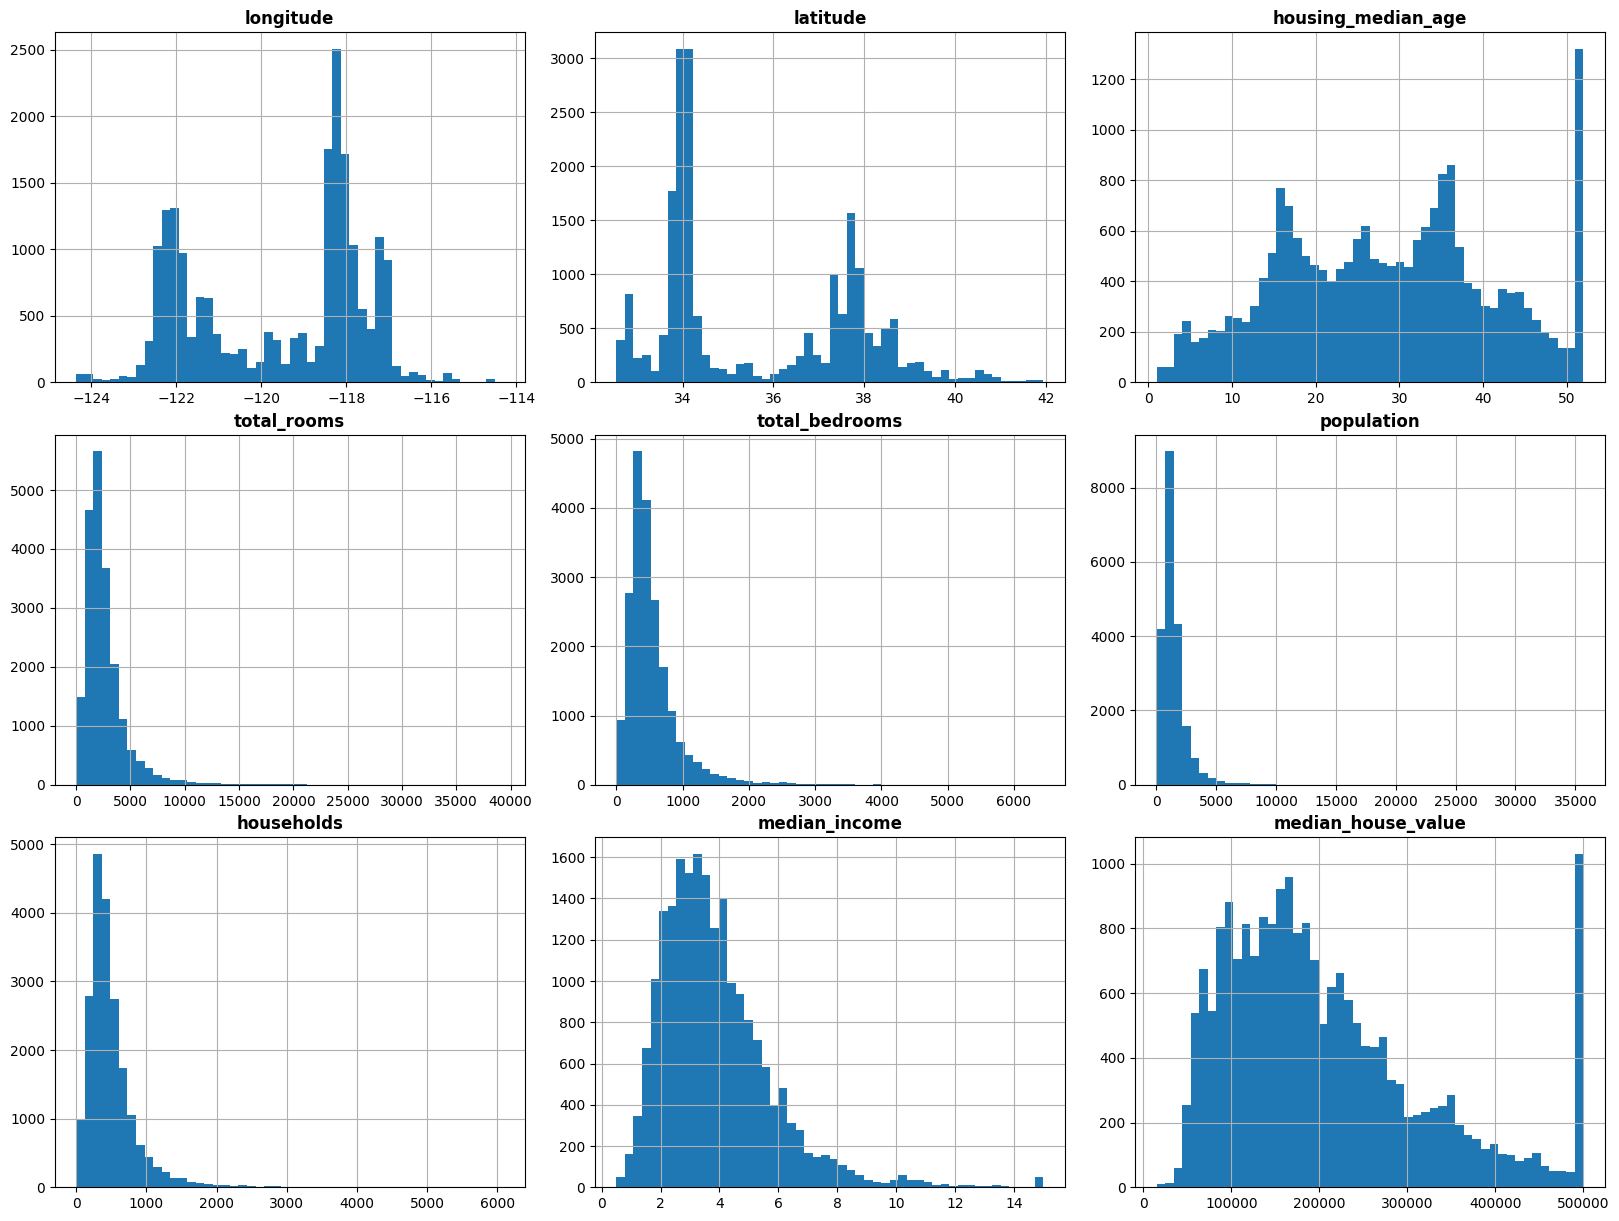

In [12]:
import matplotlib.pyplot as plt

# Create the histogram
ax = housing.hist(bins=50, figsize=(20, 15))

# Make titles bold for each subplot
for axes in ax.flatten():
    axes.set_title(axes.get_title(), fontweight='bold', fontsize=12)

# Adjust the spacing between the subplots
plt.subplots_adjust(hspace=0.15, wspace=0.15)  # You can reduce the values for smaller space

plt.show()


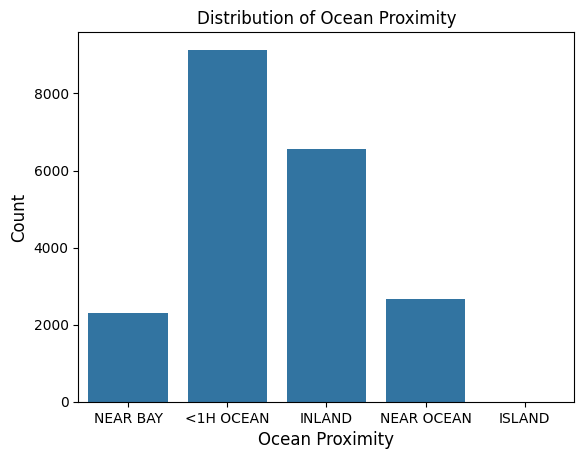

In [13]:
# Bar plot for ocean_proximity (categorical data) without 'palette' argument
sns.countplot(x='ocean_proximity', data=housing)  # No need for the palette argument
plt.title('Distribution of Ocean Proximity', fontsize=12)
plt.xlabel('Ocean Proximity', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()


In [14]:
corr_matrix = housing.corr(numeric_only=True)
corr_matrix

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000


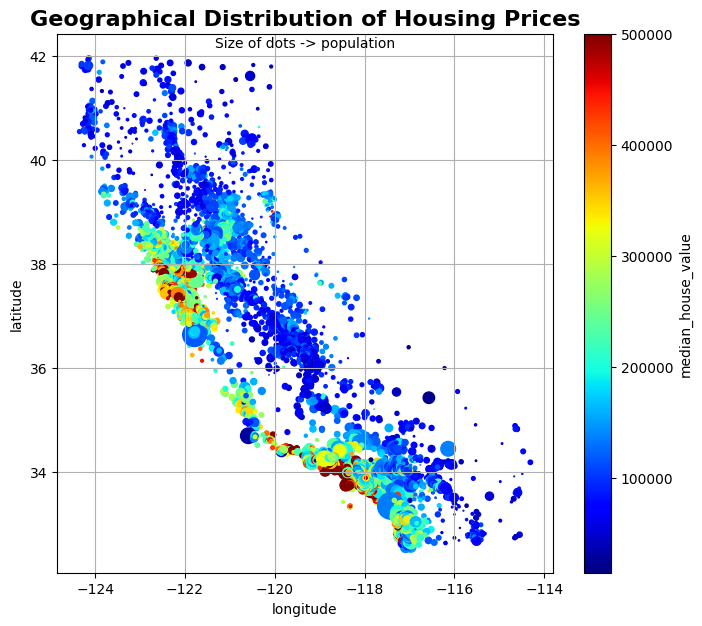

In [15]:
import matplotlib.pyplot as plt

housing.plot(kind="scatter",
        x="longitude",
        y="latitude",
        s=housing['population'] / 100,
        c='median_house_value',
        cmap='jet',
        figsize=(8,7),
        grid=True)

# Adding title with a larger font size for the main title
plt.title("Geographical Distribution of Housing Prices", fontsize=16, fontweight='bold')

# Adding the subtitle below the title with smaller font size
plt.text(x=0.5, y=0.97, s="Size of dots -> population", ha='center', va='bottom', transform=plt.gca().transAxes, fontsize=10)

plt.show()


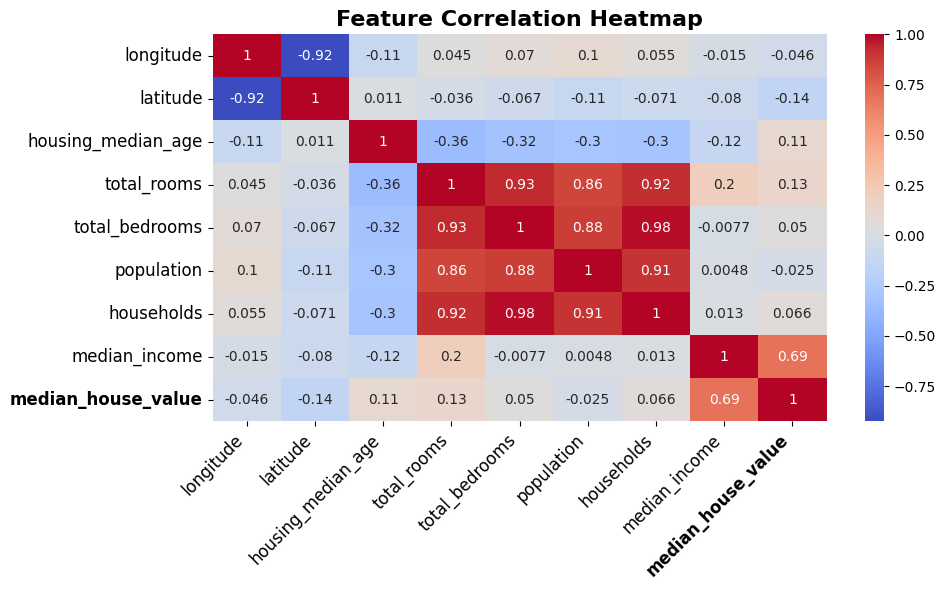

In [16]:
# Create the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(housing.corr(numeric_only=True), annot=True, cmap="coolwarm")

# Get the tick labels
x_labels = plt.gca().get_xticklabels()
y_labels = plt.gca().get_yticklabels()

# Make the pre-last x and y labels bold
x_labels[-1].set_fontweight('bold')  # Pre-last x label
y_labels[-1].set_fontweight('bold')  # Pre-last y label

# Set the title and axis labels
plt.title("Feature Correlation Heatmap", fontsize=16, fontweight='bold')

# Rotate and adjust label positioning
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(rotation=0, fontsize=12)

# Apply tight layout for better spacing
plt.tight_layout()

plt.show()


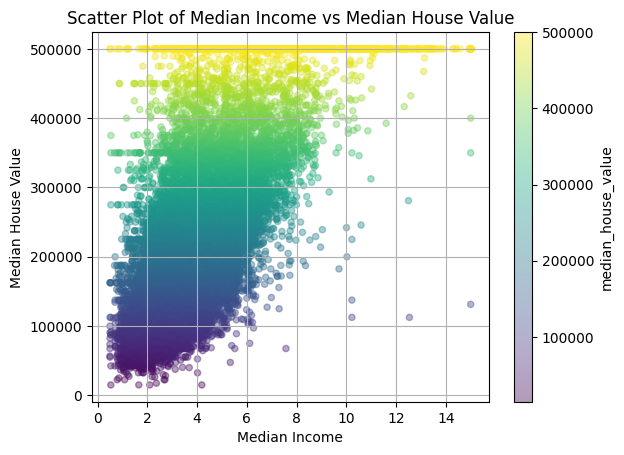

In [17]:
housing.plot(kind="scatter", x="median_income", y="median_house_value", alpha=0.4, c='median_house_value', cmap='viridis', grid=True)

# Adding title and axis labels
plt.title("Scatter Plot of Median Income vs Median House Value")
plt.xlabel("Median Income")
plt.ylabel("Median House Value")

plt.show()


### Preprocessing

In [19]:
# Remove duplicate rows if any
housing.drop_duplicates(keep='first')

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [21]:
# Data cleaning: Remove rows with missing values (NaN)
housing = housing.dropna()

In [22]:
housing.shape

(20433, 10)

In [23]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = housing['median_house_value'].quantile(0.25)
Q3 = housing['median_house_value'].quantile(0.75)

# Calculate IQR (Interquartile Range)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers from the DataFrame based on IQR method
df = housing[(housing['median_house_value'] >= lower_bound) & (housing['median_house_value'] <= upper_bound)]

In [24]:
df.shape

(19369, 10)

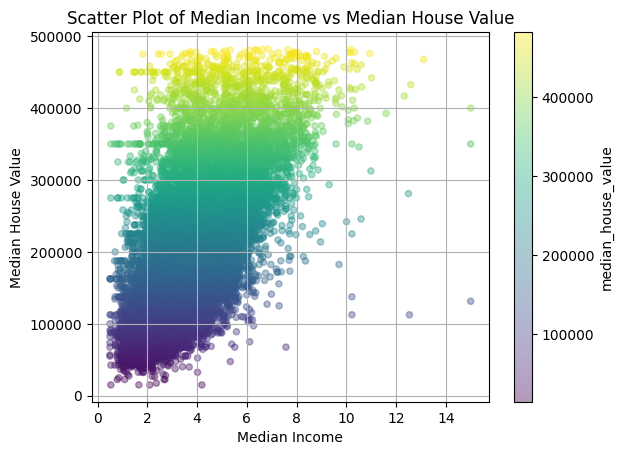

In [25]:
df.plot(kind="scatter", x="median_income", y="median_house_value", alpha=0.4, c='median_house_value', cmap='viridis', grid=True)

# Adding title and axis labels
plt.title("Scatter Plot of Median Income vs Median House Value")
plt.xlabel("Median Income")
plt.ylabel("Median House Value")

plt.show()

### Feature Engineering

In [26]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [28]:
df = df.copy()

# Creating new features based on existing ones:
# Rooms per house: total rooms divided by households
df.loc[:, 'rooms_per_house'] = df['total_rooms'] / df['households']

# Bedroom ratio: total bedrooms divided by total rooms
df.loc[:, 'bedroom_ratio'] = df['total_bedrooms'] / df['total_rooms']

# People per house: population divided by households
df.loc[:, 'people_per_house'] = df['population'] / df['households']

### Defining Preprocessing Pipelines for Numerical and Categorical Features

In [29]:
# Define the numerical features
num_features = ['latitude', 'longitude', 'housing_median_age',  
                'population',
                'total_rooms', 'total_bedrooms', 'households',
                'median_income',
                'people_per_house', 'rooms_per_house', 'bedroom_ratio'
                ]
# Define the categorical features
cat_features = ['ocean_proximity']  # Categorical feature for one-hot encoding

In [30]:
# Numerical pipeline: scale numerical features using StandardScaler
num_pipeline = Pipeline([
    ("scaler", StandardScaler())
])

In [31]:
# Categorical pipeline: one-hot encode categorical features
cat_pipeline = Pipeline([
    ("encoder", OneHotEncoder(handle_unknown="ignore"))
])

In [32]:
# ColumnTransformer to apply the appropriate preprocessing steps to the features
preprocessor = ColumnTransformer([
    ("num", num_pipeline, num_features),
    ("cat", cat_pipeline, cat_features)
])

In [33]:
import joblib

# Assuming your model and preprocessor are already defined and fitted
# Save the preprocessor and model to disk
joblib.dump(preprocessor, 'Models//preprocessor.pkl')

['Models//preprocessor.pkl']

In [35]:
preprocessor

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('scaler', StandardScaler())]),
                                 ['latitude', 'longitude', 'housing_median_age',
                                  'population', 'total_rooms', 'total_bedrooms',
                                  'households', 'median_income',
                                  'people_per_house', 'rooms_per_house',
                                  'bedroom_ratio']),
                                ('cat',
                                 Pipeline(steps=[('encoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['ocean_proximity'])])

### Dividing Data for Training, Validation, and Testing

In [40]:
# Apply KMeans clustering on 'median_house_value'
kmeans = KMeans(n_clusters=5, random_state=42)

# Ensure that you're modifying the DataFrame in place using .loc
df.loc[:, 'median_house_value_cluster'] = kmeans.fit_predict(df[['median_house_value']])

In [41]:
df.groupby('median_house_value_cluster')['median_house_value'].median()

median_house_value_cluster
0    213400.0
1    381800.0
2     87650.0
3    283500.0
4    151400.0
Name: median_house_value, dtype: float64

In [42]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_house,bedroom_ratio,people_per_house,median_house_value_cluster
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,6.984127,0.146591,2.555556,1
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,6.238137,0.155797,2.109842,1
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,8.288136,0.129516,2.802260,1
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,5.817352,0.184458,2.547945,1
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,6.281853,0.172096,2.181467,1


<Axes: xlabel='median_house_value_cluster'>

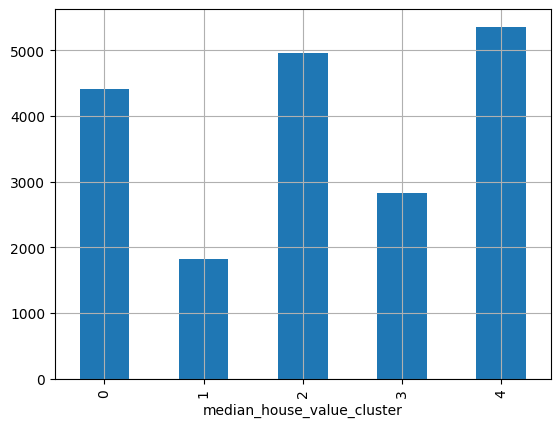

In [43]:
df['median_house_value_cluster'].value_counts().sort_index().plot.bar(grid=True)

In [274]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,median_house_value_cluster,rooms_per_house,bedroom_ratio,people_per_house
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,1,6.984127,0.146591,2.555556
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,1,6.238137,0.155797,2.109842
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,1,8.288136,0.129516,2.802260
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,1,5.817352,0.184458,2.547945
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,1,6.281853,0.172096,2.181467
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND,2,5.045455,0.224625,2.560606
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND,2,6.114035,0.215208,3.122807
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND,2,5.205543,0.215173,2.325635
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND,2,5.329513,0.219892,2.123209


In [44]:
# Split the data into train (70%), validation (15%), and test (15%) sets
train_df, temp_df = train_test_split(df, test_size=0.3, stratify=df['median_house_value_cluster'], random_state=42)
val_df, test_df = train_test_split(temp_df, test_size=0.5, stratify=temp_df['median_house_value_cluster'], random_state=42)

# Prepare X (features) and y (target) for train, validation, and test
X_train, y_train = train_df.drop(columns=['median_house_value', 'median_house_value_cluster']), train_df['median_house_value']
X_val, y_val = val_df.drop(columns=['median_house_value', 'median_house_value_cluster']), val_df['median_house_value']
X_test, y_test = test_df.drop(columns=['median_house_value', 'median_house_value_cluster']), test_df['median_house_value']

# Apply preprocessing (fit on train, transform on train, validation, and test sets)
X_train = preprocessor.fit_transform(X_train)
X_val = preprocessor.transform(X_val)
X_test = preprocessor.transform(X_test)

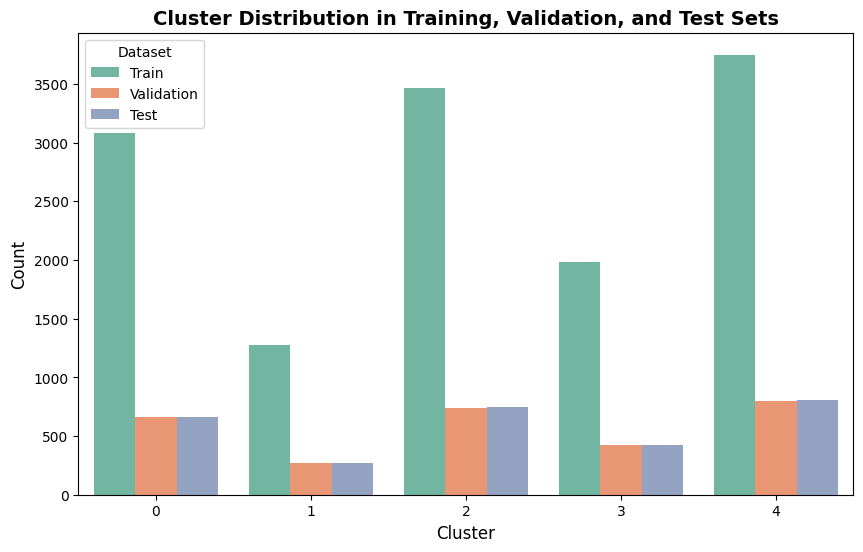

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Create a DataFrame to store counts for each dataset
cluster_counts = pd.DataFrame({
    'Cluster': sorted(train_df['median_house_value_cluster'].unique()),
    'Train': train_df['median_house_value_cluster'].value_counts(sort=False),
    'Validation': val_df['median_house_value_cluster'].value_counts(sort=False),
    'Test': test_df['median_house_value_cluster'].value_counts(sort=False)
}).melt(id_vars='Cluster', var_name='Dataset', value_name='Count')

# Plot the grouped bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='Cluster', y='Count', hue='Dataset', data=cluster_counts, palette='Set2')

# Add title and labels
plt.title("Cluster Distribution in Training, Validation, and Test Sets", fontsize=14, fontweight='bold')
plt.xlabel("Cluster", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.legend(title="Dataset")

# Show the plot
plt.show()


### Model Training and Evaluation with XGBoost

In [51]:
# Define the XGBoost Regressor model
model = xgb.XGBRegressor(random_state=42)

# Define the parameter grid for GridSearchCV to tune hyperparameters
param_grids = {
    'XGBoost': {
        'n_estimators': [100, 200],           # Number of trees
        'learning_rate': [0.01, 0.1],         # Learning rate
        'max_depth': [3, 5, 7],                # Depth of the trees
        'subsample': [0.7, 1],                 # Fraction of samples to use for each tree
        'colsample_bytree': [0.7, 1],          # Fraction of features to use for each tree
        'gamma': [0, 0.1, 0.2],                # Regularization term
    }
}

In [52]:
# Initialize GridSearchCV to find the best hyperparameters using cross-validation
grid_search = GridSearchCV(model, param_grids['XGBoost'], cv=3, scoring='neg_root_mean_squared_error', verbose=1, n_jobs=1)

# Fit the grid search model to the training data
grid_search.fit(X_train, y_train)

# Get the best model after grid search
best_model = grid_search.best_estimator_
print("Best parameters found: ", grid_search.best_params_)

Fitting 3 folds for each of 144 candidates, totalling 432 fits
Best parameters found:  {'colsample_bytree': 0.7, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200, 'subsample': 1}


In [53]:
# Perform cross-validation on the entire training set
cross_val_scores = cross_val_score(best_model, X_train, y_train, cv=5, scoring='neg_root_mean_squared_error')
print(f"Cross-Validation RMSE (5-fold): {-cross_val_scores.mean():.4f}")

# Evaluate the best model on the validation set
y_val_pred = best_model.predict(X_val)
val_rmse = np.sqrt(mean_squared_error(y_val, y_val_pred))  # Root Mean Squared Error
print(f"Validation RMSE: {val_rmse}")

Cross-Validation RMSE (5-fold): 41121.9642
Validation RMSE: 41976.76872624662


In [54]:
# Final evaluation on the test set
y_test_pred = best_model.predict(X_test)

# Calculate additional evaluation metrics on the test set
mae = mean_absolute_error(y_test, y_test_pred)  # Mean Absolute Error
mse = mean_squared_error(y_test, y_test_pred)   # Mean Squared Error
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))  # Root Mean Squared Error
r2 = r2_score(y_test, y_test_pred)              # R² score



# Print the evaluation metrics
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"RMSE: {test_rmse}")
print(f"R2 Score: {r2}")

Mean Absolute Error: 26459.897055660702
Mean Squared Error: 1525482941.918776
RMSE: 39057.43132770991
R2 Score: 0.8305263392554142


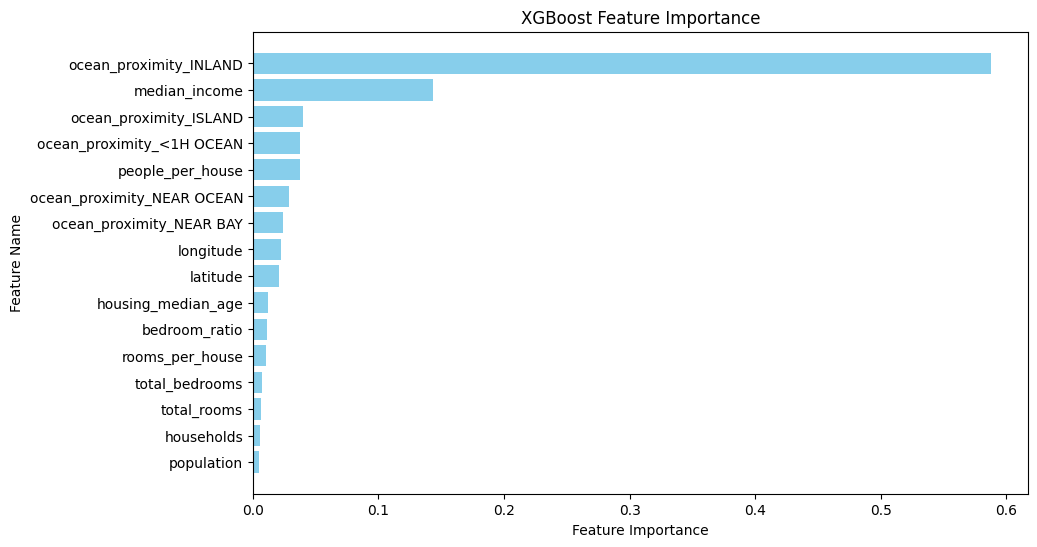

In [92]:
# Extract feature importance from the best model
feature_names = (
    num_features + 
    list(preprocessor.transformers_[1][1].get_feature_names_out(cat_features))  # One-hot encoded feature names
)

feature_importance = best_model.feature_importances_  # Get feature importance scores
sorted_idx = np.argsort(feature_importance)[::-1]  # Sort features by importance (descending order)

# Plot the feature importance using a horizontal bar chart
plt.figure(figsize=(10, 6))
plt.barh([feature_names[i] for i in sorted_idx], feature_importance[sorted_idx], color='skyblue')
plt.xlabel("Feature Importance")
plt.ylabel("Feature Name")
plt.title("XGBoost Feature Importance")
plt.gca().invert_yaxis()  # Invert y-axis so the most important feature is at the top
plt.show()

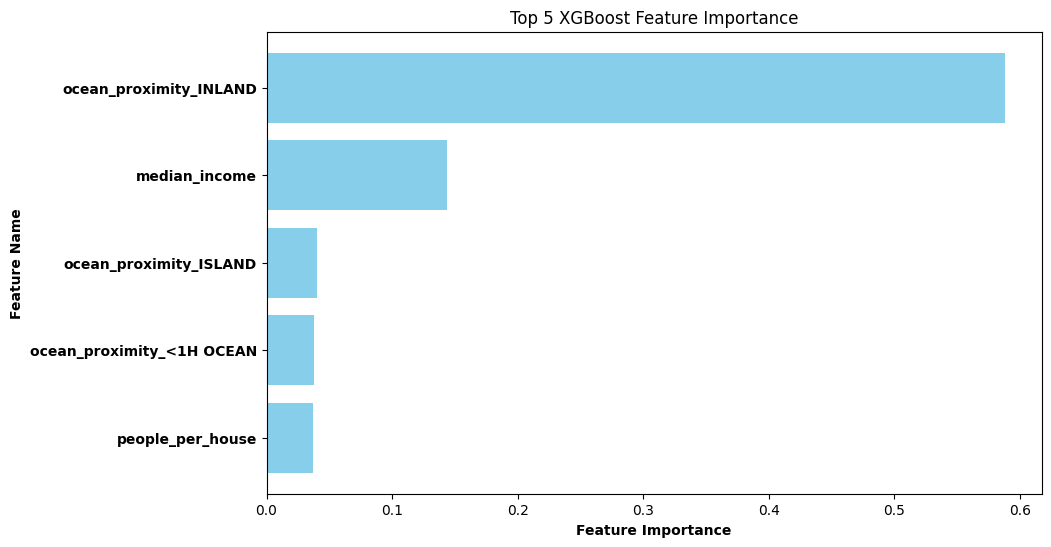

In [107]:
# Plot the top 5 feature importance using a horizontal bar chart
plt.figure(figsize=(10, 6))
plt.barh(top_5_features, top_5_importance, color='skyblue')
plt.xlabel("Feature Importance", fontweight='bold')
plt.ylabel("Feature Name", fontweight='bold')
plt.title("Top 5 XGBoost Feature Importance")

# Invert y-axis so the most important feature is at the top
plt.gca().invert_yaxis()

# Make the y-axis tick labels bold
plt.gca().tick_params()
plt.yticks(fontweight='bold')

plt.show()


In [58]:
def plot_true_vs_predicted(y_true, y_pred, type_of_model):
    """
    Method to plot a scatter plot of true vs predicted values.

    Parameters:
    y_true (array-like): The true target values.
    y_pred (array-like): The predicted target values.

    """
    # Scatter plot of true vs predicted values on the test set
    plt.scatter(y_true, y_pred, alpha=0.6, color='b', edgecolors='w', linewidth=0.5)
    plt.title(f'True vs Predicted Values on Test Set - {type_of_model}')
    plt.xlabel("Actual Median House Value")
    plt.ylabel("Predicted Median House Value")
    plt.grid(True)

    # Set the axis to have the same scale and no gaps between the axes
    min_val = min(y_true.min(), y_pred.min())  # Smallest value between true and predicted
    max_val = max(y_true.max(), y_pred.max())  # Largest value between true and predicted
    plt.xlim(min_val, max_val)  # Set x-axis limits to the data range
    plt.ylim(min_val, max_val)  # Set y-axis limits to the data range

    # Plot a red line where True = Predicted (y = x) for visual comparison
    plt.plot([min_val, max_val], [min_val, max_val], color='r', linestyle='--')

    # Show the plot
    plt.show()

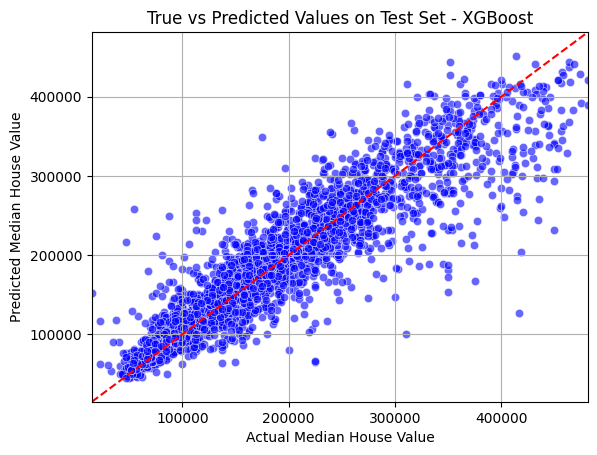

In [59]:
plot_true_vs_predicted(y_test, y_test_pred, 'XGBoost')

In [61]:
# Save the best model to a JSON file
best_model.save_model("Models\\CaliforniaBestHousingModel.json")

### Model Training and Evaluation with Random Forest

In [62]:
# Define the RandomForest Regressor
rf_model = RandomForestRegressor(random_state=42)

In [63]:
# Define the parameter grid for GridSearchCV
param_grids_rf = {
    'RandomForest': {
        'n_estimators': [100, 200],
        'max_depth': [3, 5, 7],
        'min_samples_split': [2, 5],
        'min_samples_leaf': [1, 2],
        'bootstrap': [True, False],
    }
}

In [64]:
# Initialize GridSearchCV for RandomForest
grid_search_rf = GridSearchCV(rf_model, param_grids_rf['RandomForest'], cv=3, scoring='neg_root_mean_squared_error', verbose=1, n_jobs=1)

# Fit the grid search model for RandomForest
grid_search_rf.fit(X_train, y_train)

# Get the best parameters and model from the grid search for RandomForest
best_rf_model = grid_search_rf.best_estimator_
print("Best parameters found for Random Forest: ", grid_search_rf.best_params_)

Fitting 3 folds for each of 48 candidates, totalling 144 fits
Best parameters found for Random Forest:  {'bootstrap': True, 'max_depth': 7, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}


In [65]:
# Cross-Validation for RandomForest
cross_val_scores_rf = cross_val_score(best_rf_model, X_train, y_train, cv=5, scoring='neg_root_mean_squared_error')
print(f"Cross-Validation RMSE for Random Forest (5-fold): {-cross_val_scores_rf.mean():.4f}")

# Evaluate the best Random Forest model on the validation set
y_val_pred_rf = best_rf_model.predict(X_val)
val_rmse_rf = np.sqrt(mean_squared_error(y_val, y_val_pred_rf))
print(f"Validation RMSE for Random Forest: {val_rmse_rf}")

Cross-Validation RMSE for Random Forest (5-fold): 50723.2904
Validation RMSE for Random Forest: 52087.68196049443


In [66]:
# Final Evaluation on Test Set for RandomForest
y_test_pred_rf = best_rf_model.predict(X_test)


# Calculate MAE, MSE, and R² score for RandomForest
mae_rf_2 = mean_absolute_error(y_test, y_test_pred_rf)
mse_rf_2 = mean_squared_error(y_test, y_test_pred_rf)
test_rmse_2 = np.sqrt(mean_squared_error(y_test, y_test_pred_rf))
r2_2 = r2_score(y_test, y_test_pred_rf)

print(f"Random Forest - Mean Absolute Error: {mae_rf_2}")
print(f"Random Forest - Mean Squared Error: {mse_rf_2}")
print(f"Random Forest - RMSE : {test_rmse_2}")
print(f"Random Forest - R2 Score: {r2_2}")

Random Forest - Mean Absolute Error: 36308.650715522344
Random Forest - Mean Squared Error: 2521857283.9475727
Random Forest - RMSE : 50218.097175695264
Random Forest - R2 Score: 0.7198340446544634


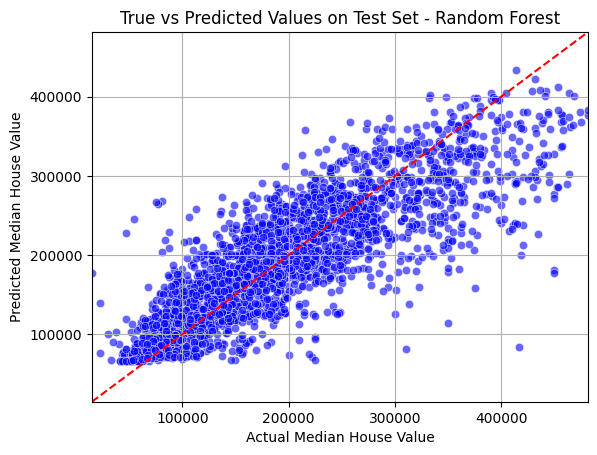

In [67]:
plot_true_vs_predicted(y_test, y_test_pred_rf, 'Random Forest')

### Model Training and Evaluation with SVM

In [68]:
# Define the Support Vector Regressor (SVM)
model = SVR(kernel='rbf', C=1, epsilon=0.1)

# Define the parameter grid for GridSearchCV
param_grids = {
    'SVR': {
        'C': [1, 10, 100],
        'epsilon': [0.1, 0.2, 0.3],
        'kernel': ['rbf', 'linear'],
    }
}

In [69]:
# Initialize GridSearchCV without parallelism (n_jobs=1)
grid_search = GridSearchCV(model, param_grids['SVR'], cv=3, scoring='neg_root_mean_squared_error', verbose=1, n_jobs=1)

# Fit the grid search model
grid_search.fit(X_train, y_train)

# Get the best parameters and model from the grid search
best_model_svm = grid_search.best_estimator_
print("Best parameters found: ", grid_search.best_params_)


Fitting 3 folds for each of 18 candidates, totalling 54 fits
Best parameters found:  {'C': 100, 'epsilon': 0.3, 'kernel': 'linear'}


In [70]:
# Cross-Validation (using the entire training set)
cross_val_scores = cross_val_score(best_model_svm, X_train, y_train, cv=5, scoring='neg_root_mean_squared_error')
print(f"Cross-Validation RMSE (5-fold): {-cross_val_scores.mean():.4f}")

# Evaluate the best model on the validation set (X_val)
y_val_pred_svm = best_model.predict(X_val)
val_rmse = np.sqrt(mean_squared_error(y_val, y_val_pred_svm))
print(f"Validation RMSE: {val_rmse}")

Cross-Validation RMSE (5-fold): 62089.2870
Validation RMSE: 41976.76872624662


In [71]:
# Predicted values for test data
y_test_pred_svm = best_model_svm.predict(X_test)

# Calculate MAE, MSE, and R² score
mae_3 = mean_absolute_error(y_test, y_test_pred_svm)
mse_3 = mean_squared_error(y_test, y_test_pred_svm)
test_rmse_3 = np.sqrt(mean_squared_error(y_test, y_test_pred_svm))
r2_3 = r2_score(y_test, y_test_pred_svm)

# Print the results
print(f"SVM - Mean Absolute Error: {mae_3}")
print(f"SVM - Mean Squared Error: {mse_3}")
print(f"SVM - RMSE: {test_rmse_3}")
print(f"SVM - R2 Score: {r2_3}")

SVM - Mean Absolute Error: 42108.97073786417
SVM - Mean Squared Error: 3503516317.0828667
SVM - RMSE: 59190.508673966186
SVM - R2 Score: 0.6107765485810088


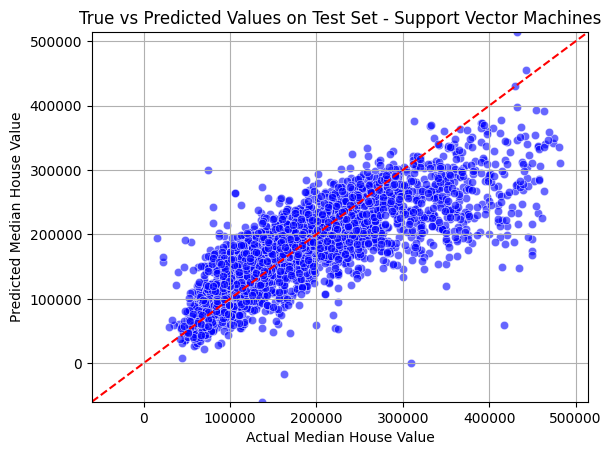

In [72]:
plot_true_vs_predicted(y_test, y_test_pred_svm, 'Support Vector Machines')

### Model Training and Evaluation with Linear Regression

In [73]:
# Define the Linear Regression Model
model = LinearRegression()


In [74]:
# Define the parameter grid for GridSearchCV (only for `fit_intercept`)
param_grid = {
    'regressor__fit_intercept': [True, False]  # Specify the step name 'regressor'
}

# Apply StandardScaler separately in the pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Feature scaling
    ('regressor', model)
])

# Initialize GridSearchCV with a parameter grid that includes 'regressor__fit_intercept'
grid_search = GridSearchCV(pipeline, param_grid, cv=3, scoring='neg_root_mean_squared_error', verbose=1, n_jobs=-1)

# Fit the grid search model
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 2 candidates, totalling 6 fits


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('regressor', LinearRegression())]),
             n_jobs=-1, param_grid={'regressor__fit_intercept': [True, False]},
             scoring='neg_root_mean_squared_error', verbose=1)

In [75]:
# Get the best parameters and model from the grid search
best_model_lr = grid_search.best_estimator_
print("Best parameters found: ", grid_search.best_params_)


Best parameters found:  {'regressor__fit_intercept': True}


In [76]:
# Cross-Validation (using the entire training set)
cross_val_scores = cross_val_score(best_model_lr, X_train, y_train, cv=5, scoring='neg_root_mean_squared_error')
print(f"Cross-Validation RMSE (5-fold): {-cross_val_scores.mean():.4f}")

# Evaluate the best model on the validation set (X_val)
y_val_pred_lr = best_model_lr.predict(X_val)
val_rmse = np.sqrt(mean_squared_error(y_val, y_val_pred_lr))
print(f"Validation RMSE: {val_rmse}")

Cross-Validation RMSE (5-fold): 58494.4361
Validation RMSE: 60320.34718973699


In [77]:
# Final Evaluation on Test Set (X_test)
y_test_pred_lr = best_model_lr.predict(X_test)

# Calculate MAE, MSE, and R² score
mae_4 = mean_absolute_error(y_test, y_test_pred_lr)
mse_4 = mean_squared_error(y_test, y_test_pred_lr)
test_rmse_4 = np.sqrt(mean_squared_error(y_test, y_test_pred_lr))
r2_4 = r2_score(y_test, y_test_pred_lr)

# Print the results
print(f"Mean Absolute Error: {mae_4}")
print(f"Mean Squared Error: {mse_4}")
print(f"RMSE: {test_rmse_4}")
print(f"R2 Score: {r2_4}")


Mean Absolute Error: 42459.49353456564
Mean Squared Error: 3294203509.738685
RMSE: 57395.15231915223
R2 Score: 0.6340301732047795


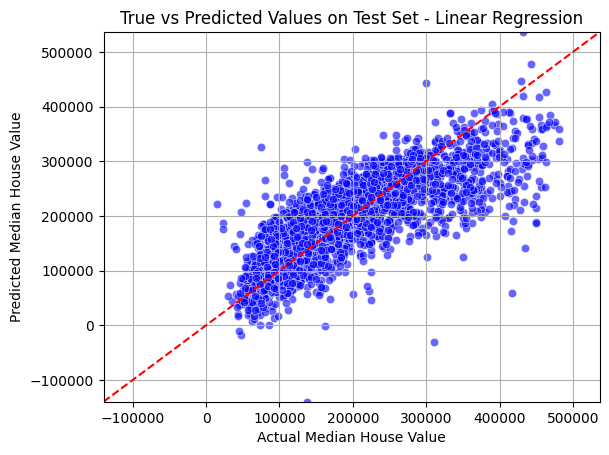

In [78]:
plot_true_vs_predicted(y_test, y_test_pred_lr, 'Linear Regression')

### Evaluation of the best models of every type - diagrams

In [79]:
# Example data: One score per model
models = ['XGBoost', 'RandomForest', 'SVM', 'LinearRegression']
r2_scores = [r2, r2_2, r2_3, r2_4]  # Example R² scores
rmse_scores = [test_rmse, test_rmse_2, test_rmse_3, test_rmse_4]  # Example RMSE scores

# Create a DataFrame to hold the results
df_scores = pd.DataFrame({
    'Model': models,
    'R² Score': r2_scores,
    'RMSE': rmse_scores
})

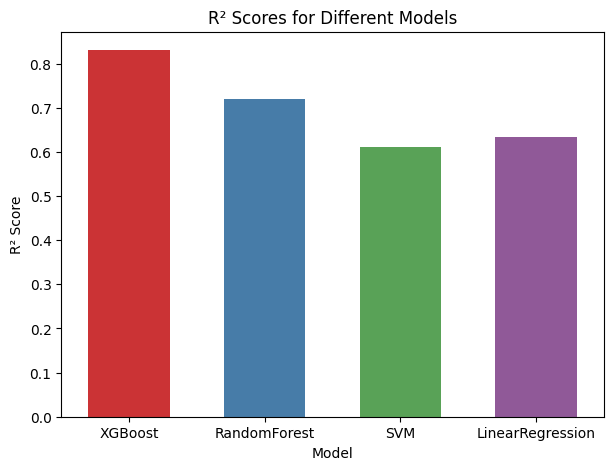

In [85]:
# Bar plot for R² scores with distinct colors
plt.figure(figsize=(7, 5))
sns.barplot(x='Model', y='R² Score', data=df_scores, hue='Model', palette='Set1', width=0.6)  # Adjust width to make bars smaller
plt.title('R² Scores for Different Models')
plt.ylabel('R² Score')
plt.xlabel('Model')
plt.show()


### Diving into the best model

In [86]:
best_model

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.7, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=7, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=200, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

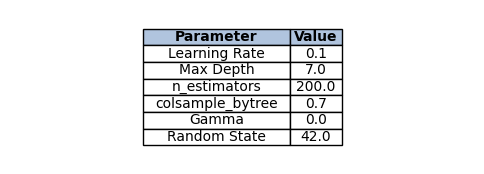

In [88]:
# Create a DataFrame with parameter values
data = {
    "Parameter": ["Learning Rate", "Max Depth", "n_estimators", "colsample_bytree", "Gamma", "Random State"],
    "Value": [0.1, 7, 200, 0.7, 0, 42]
}

df = pd.DataFrame(data)

# Plot the table with smaller spacing
fig, ax = plt.subplots(figsize=(6, 2))  # Adjust figsize as needed
ax.axis('tight')
ax.axis('off')

# Create the table with tight column spacing
table = ax.table(cellText=df.values, colLabels=df.columns, loc='center', cellLoc='center', colColours=["#f5f5f5"]*2)

# Color the first row (header)
for (i, j), cell in table.get_celld().items():
    if i == 0:  # First row
        cell.set_text_props(fontweight='bold')
        cell.set_facecolor('#B0C4DE')  # Light blue color for header row

# Adjust table properties for a more compact look
table.auto_set_font_size(False)
table.set_fontsize(10)  # Smaller font size for compactness
table.auto_set_column_width([0, 1])  # Automatically adjust column w


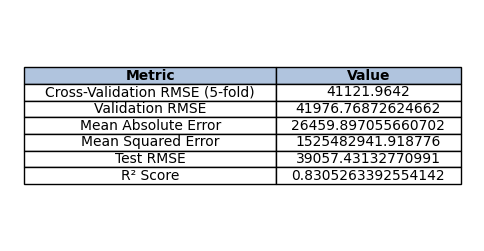

In [90]:
# Data for the table
data = {
    "Metric": [
        "Cross-Validation RMSE (5-fold)", 
        "Validation RMSE", 
        "Mean Absolute Error", 
        "Mean Squared Error", 
        "Test RMSE", 
        "R² Score"
    ],
    "Value": [
        41121.9642, 
        41976.76872624662, 
        26459.897055660702, 
        1525482941.918776, 
        39057.43132770991, 
        0.8305263392554142
    ]
}

# Create DataFrame
df = pd.DataFrame(data)

# Plotting the table
fig, ax = plt.subplots(figsize=(6, 3))  # Adjust the figure size as needed
ax.axis('tight')
ax.axis('off')

# Create the table
table = ax.table(cellText=df.values, colLabels=df.columns, loc='center', cellLoc='center', colColours=["#f5f5f5"]*2)

# Color the first row (header)
for (i, j), cell in table.get_celld().items():
    if i == 0:  # First row (header)
        cell.set_text_props(fontweight='bold')
        cell.set_facecolor('#B0C4DE')  # Light blue color for header row

# Adjust font size and spacing for compactness
table.auto_set_font_size(False)
table.set_fontsize(10)  # Smaller font size for compactness
table.auto_set_column_width([0, 1])  # Automatically adjust column widths

# Show the table
plt.show()
